# WordCloud, presidential conferences (México)

## Extract data

In [1]:
!python3 -m pip install --upgrade pip

!pip3 install wheel
!pip3 install jupyter
!pip3 install bs4 requests numpy
!pip3 install pandas
!pip3 install nltk wordcloud stop-words

In [2]:
from bs4 import BeautifulSoup
import requests

# 19-Feb-2021 Conference URL
url = 'https://presidente.gob.mx/19-02-21-version-estenografica-de-la-conferencia-de-prensa-matutina-del-presidente-andres-manuel-lopez-obrador/'

res_request = requests.get(url)

In [3]:
soup = BeautifulSoup(res_request.text, 'html.parser')

In [4]:
# Extract the text and speakers
soup1 = soup.select("div p")
soup1

[<p style="text-align: right;"><em>2021: Año de la Independencia</em></p>,
 <p> </p>,
 <p><strong>PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:</strong> Buenos días.</p>,
 <p>Hoy vamos a informar sobre el avance en materia de seguridad pública, la evaluación en esta materia, como lo hacemos cada mes, corresponde ahora informar sobre el trabajo que se está haciendo de manera coordinada.</p>,
 <p>Les recuerdo, señalo, llamo la atención a todas, a todos los mexicanos que diariamente de 6:00 a 7:00 de la mañana tenemos reunión del Gabinete de Seguridad de lunes a viernes, todos los días recibimos el informe, el parte de lo que sucede en las últimas 24 horas en el país y estamos trabajando de manera conjunta, coordinada, todos nos reunimos para tratar este asunto de tanto interés para la población, que es la paz, la tranquilidad de los mexicanos.</p>,
 <p><audio controls="controls" src="https://lopezobrador.org.mx/wp-content/uploads/2021/02/2021-02-19-Matutina.mp3"></audio></p>,
 <p><iframe allow

In [5]:
# Analize and complete the names of speakers

import numpy as np 

speaker = []
current_speaker = np.nan

for i in soup1:
        if i.strong:
            speaker.append(i.strong.text)
            current_speaker = i.strong.text
        else:
            speaker.append(current_speaker)
len(speaker)

348

In [6]:
speaker

[nan,
 nan,
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'ROSA ICELA RODRÍGUEZ VELÁZQUEZ, SECRETARIA DE SEGURIDAD PÚBLICA Y PROTECCIÓN CIUDADANA:',
 'ROSA ICELA ROD

In [7]:
set_speakers = set(speaker)
set_speakers

{'ANDRÉ GEORGES FOULLON VAN LISSUM, SUBSECRETARIO DE LA DEFENSA NACIONAL:',
 'Andrés Manuel López Obrador',
 'INTERLOCUTOR:',
 'INTERLOCUTOR: ',
 'INTERLOCUTORA:',
 'JESÚS RAMÍREZ CUEVAS, COORDINADOR GENERAL DE COMUNICACIÓN SOCIAL Y VOCERO DE LA PRESIDENCIA: ',
 'JESÚS RAMÍREZ CUEVAS:',
 'LUIS RODRÍGUEZ BUCIO, COMANDANTE DE LA GUARDIA NACIONAL:',
 'LUIS RODRÍGUEZ BUCIO:',
 'PREGUNTA:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'RAFAEL OJEDA DURÁN, SECRETARIO DE MARINA:',
 'ROSA ICELA RODRÍGUEZ VELÁZQUEZ, SECRETARIA DE SEGURIDAD PÚBLICA Y PROTECCIÓN CIUDADANA:',
 'ROSA ICELA RODRÍGUEZ VELÁZQUEZ: ',
 nan}

In [8]:
# Count speech rows
speech = [i.text for i in soup1]
len(speech)

348

In [9]:
# Create a dataframe with speakers and speech

import pandas as pd

dfa = pd.DataFrame(
                    {
                        "speaker" : speaker,
                        "speech" : speech
                    })
dfa

,speaker,speech
0,NaN,2021: Año de la Independencia
1,NaN,
2,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR: Buenos...
3,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,Hoy vamos a informar sobre el avance en materi...
4,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,"Les recuerdo, señalo, llamo la atención a toda..."
...,...,...
343,Andrés Manuel López Obrador,Presidente de México
344,Andrés Manuel López Obrador,t. 5093 4900
345,Andrés Manuel López Obrador,t. 01800 080 1127
346,Andrés Manuel López Obrador,"Puerta 8 Palacio Nacional, Plaza de la Constit..."


In [10]:
# Delete empty rows (without speakers: titles or dates)
dfa = dfa.dropna()
dfa.head()

,speaker,speech
2,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR: Buenos...
3,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,Hoy vamos a informar sobre el avance en materi...
4,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,"Les recuerdo, señalo, llamo la atención a toda..."
5,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,
6,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,


In [11]:
# Get names of indexes for which column it's not a speech
indexNames = dfa[ dfa['speech'].str.contains('Copyright Derechos Reservados') ].index

dfb = dfa.copy()
# Delete these row indexes from dataFrame
dfb.drop(indexNames , inplace=True )

In [12]:
# Get names of indexes for which column it's not a speech
indexNames = dfb[ dfb['speech'] == '+++++' ].index

dfc = dfb.copy()

# Delete these row indexes from dataFrame
dfc.drop(indexNames , inplace=True)

In [13]:
# Get names of indexes for which column it's not a speech
indexNames = dfc[ dfc['speech'].str.lower().str.contains('inaudible')].index

dfd = dfc.copy()

# Delete these row indexes from dataFrame
dfd.drop(indexNames , inplace=True)

In [14]:
dfd

,speaker,speech
2,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR: Buenos...
3,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,Hoy vamos a informar sobre el avance en materi...
4,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,"Les recuerdo, señalo, llamo la atención a toda..."
5,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,
6,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,
...,...,...
343,Andrés Manuel López Obrador,Presidente de México
344,Andrés Manuel López Obrador,t. 5093 4900
345,Andrés Manuel López Obrador,t. 01800 080 1127
346,Andrés Manuel López Obrador,"Puerta 8 Palacio Nacional, Plaza de la Constit..."


In [15]:
dfd['speaker'] = dfd['speaker'].str.replace(':', '').str.strip()
dfd


,speaker,speech
2,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR: Buenos...
3,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Hoy vamos a informar sobre el avance en materi...
4,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,"Les recuerdo, señalo, llamo la atención a toda..."
5,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,
6,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,
...,...,...
343,Andrés Manuel López Obrador,Presidente de México
344,Andrés Manuel López Obrador,t. 5093 4900
345,Andrés Manuel López Obrador,t. 01800 080 1127
346,Andrés Manuel López Obrador,"Puerta 8 Palacio Nacional, Plaza de la Constit..."


In [16]:
dfd['speaker'].value_counts()

PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR                                                    194
ROSA ICELA RODRÍGUEZ VELÁZQUEZ, SECRETARIA DE SEGURIDAD PÚBLICA Y PROTECCIÓN CIUDADANA     38
ANDRÉ GEORGES FOULLON VAN LISSUM, SUBSECRETARIO DE LA DEFENSA NACIONAL                     20
LUIS RODRÍGUEZ BUCIO, COMANDANTE DE LA GUARDIA NACIONAL                                    20
INTERLOCUTOR                                                                               19
RAFAEL OJEDA DURÁN, SECRETARIO DE MARINA                                                   19
INTERLOCUTORA                                                                              15
PREGUNTA                                                                                    8
Andrés Manuel López Obrador                                                                 6
LUIS RODRÍGUEZ BUCIO                                                                        3
ROSA ICELA RODRÍGUEZ VELÁZQUEZ                              

In [17]:
# Split speaker into speaker name and job title

dfd[['speaker','job']] = dfd.speaker.str.split(',', expand=True)
dfd


,speaker,speech,job
2,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR: Buenos...,None
3,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Hoy vamos a informar sobre el avance en materi...,None
4,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,"Les recuerdo, señalo, llamo la atención a toda...",None
5,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,,None
6,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,,None
...,...,...,...
343,Andrés Manuel López Obrador,Presidente de México,None
344,Andrés Manuel López Obrador,t. 5093 4900,None
345,Andrés Manuel López Obrador,t. 01800 080 1127,None
346,Andrés Manuel López Obrador,"Puerta 8 Palacio Nacional, Plaza de la Constit...",None


In [18]:
dfd['speaker'].value_counts()

PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR    194
ROSA ICELA RODRÍGUEZ VELÁZQUEZ             39
LUIS RODRÍGUEZ BUCIO                       23
ANDRÉ GEORGES FOULLON VAN LISSUM           20
RAFAEL OJEDA DURÁN                         19
INTERLOCUTOR                               19
INTERLOCUTORA                              15
PREGUNTA                                    8
Andrés Manuel López Obrador                 6
JESÚS RAMÍREZ CUEVAS                        1
Name: speaker, dtype: int64

In [19]:
dfd['job'].value_counts()

 SECRETARIA DE SEGURIDAD PÚBLICA Y PROTECCIÓN CIUDADANA    38
 COMANDANTE DE LA GUARDIA NACIONAL                         20
 SUBSECRETARIO DE LA DEFENSA NACIONAL                      20
 SECRETARIO DE MARINA                                      19
Name: job, dtype: int64

In [20]:
dfd['speaker'] = dfd['speaker'].str.strip()
dfd

,speaker,speech,job
2,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR: Buenos...,None
3,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Hoy vamos a informar sobre el avance en materi...,None
4,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,"Les recuerdo, señalo, llamo la atención a toda...",None
5,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,,None
6,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,,None
...,...,...,...
343,Andrés Manuel López Obrador,Presidente de México,None
344,Andrés Manuel López Obrador,t. 5093 4900,None
345,Andrés Manuel López Obrador,t. 01800 080 1127,None
346,Andrés Manuel López Obrador,"Puerta 8 Palacio Nacional, Plaza de la Constit...",None


In [21]:
dfd['job'] = dfd['job'].str.strip()
dfd

,speaker,speech,job
2,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR: Buenos...,None
3,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Hoy vamos a informar sobre el avance en materi...,None
4,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,"Les recuerdo, señalo, llamo la atención a toda...",None
5,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,,None
6,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,,None
...,...,...,...
343,Andrés Manuel López Obrador,Presidente de México,None
344,Andrés Manuel López Obrador,t. 5093 4900,None
345,Andrés Manuel López Obrador,t. 01800 080 1127,None
346,Andrés Manuel López Obrador,"Puerta 8 Palacio Nacional, Plaza de la Constit...",None


In [22]:
dfd['job'].value_counts()

SECRETARIA DE SEGURIDAD PÚBLICA Y PROTECCIÓN CIUDADANA    38
COMANDANTE DE LA GUARDIA NACIONAL                         20
SUBSECRETARIO DE LA DEFENSA NACIONAL                      20
SECRETARIO DE MARINA                                      19
Name: job, dtype: int64

In [23]:
# Get a set from speakers and jobs:

unique_speakers = set(dfd['speaker'])

unique_jobs = set(dfd['job'])
print(unique_speakers, unique_jobs)

{'JESÚS RAMÍREZ CUEVAS', 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR', 'ANDRÉ GEORGES FOULLON VAN LISSUM', 'LUIS RODRÍGUEZ BUCIO', 'PREGUNTA', 'INTERLOCUTORA', 'RAFAEL OJEDA DURÁN', 'Andrés Manuel López Obrador', 'INTERLOCUTOR', 'ROSA ICELA RODRÍGUEZ VELÁZQUEZ'} {'SECRETARIO DE MARINA', 'COMANDANTE DE LA GUARDIA NACIONAL', None, 'SECRETARIA DE SEGURIDAD PÚBLICA Y PROTECCIÓN CIUDADANA', 'SUBSECRETARIO DE LA DEFENSA NACIONAL'}


In [24]:
list_unique_speakers = list(unique_speakers)
list_unique_speakers 

['JESÚS RAMÍREZ CUEVAS',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR',
 'ANDRÉ GEORGES FOULLON VAN LISSUM',
 'LUIS RODRÍGUEZ BUCIO',
 'PREGUNTA',
 'INTERLOCUTORA',
 'RAFAEL OJEDA DURÁN',
 'Andrés Manuel López Obrador',
 'INTERLOCUTOR',
 'ROSA ICELA RODRÍGUEZ VELÁZQUEZ']

In [25]:
list_unique_jobs = list(unique_jobs)
list_unique_jobs

['SECRETARIO DE MARINA',
 'COMANDANTE DE LA GUARDIA NACIONAL',
 None,
 'SECRETARIA DE SEGURIDAD PÚBLICA Y PROTECCIÓN CIUDADANA',
 'SUBSECRETARIO DE LA DEFENSA NACIONAL']

In [26]:
# Order list. Necesary because...
# ...have to remove first'INTERLOCUTORA' before 'INTERLOCUTOR' or an letter 'A' is don't erased.
list_unique_speakers.sort(reverse=True)

# Erase None from the list of jobs
list_unique_jobs = list(filter(None, list_unique_jobs)) 
list_unique_jobs.sort(reverse=True)

print (list_unique_speakers, list_unique_jobs)

['ROSA ICELA RODRÍGUEZ VELÁZQUEZ', 'RAFAEL OJEDA DURÁN', 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR', 'PREGUNTA', 'LUIS RODRÍGUEZ BUCIO', 'JESÚS RAMÍREZ CUEVAS', 'INTERLOCUTORA', 'INTERLOCUTOR', 'Andrés Manuel López Obrador', 'ANDRÉ GEORGES FOULLON VAN LISSUM'] ['SUBSECRETARIO DE LA DEFENSA NACIONAL', 'SECRETARIO DE MARINA', 'SECRETARIA DE SEGURIDAD PÚBLICA Y PROTECCIÓN CIUDADANA', 'COMANDANTE DE LA GUARDIA NACIONAL']


In [27]:
# Create dict with strings to erase
dict = {}

# Add unique speakers and jobs to the dict

for sp in list_unique_speakers:
    dict[sp] = ''
    
for sp in list_unique_jobs:
    dict[sp] = ''
    
dict

{'ROSA ICELA RODRÍGUEZ VELÁZQUEZ': '',
 'RAFAEL OJEDA DURÁN': '',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR': '',
 'PREGUNTA': '',
 'LUIS RODRÍGUEZ BUCIO': '',
 'JESÚS RAMÍREZ CUEVAS': '',
 'INTERLOCUTORA': '',
 'INTERLOCUTOR': '',
 'Andrés Manuel López Obrador': '',
 'ANDRÉ GEORGES FOULLON VAN LISSUM': '',
 'SUBSECRETARIO DE LA DEFENSA NACIONAL': '',
 'SECRETARIO DE MARINA': '',
 'SECRETARIA DE SEGURIDAD PÚBLICA Y PROTECCIÓN CIUDADANA': '',
 'COMANDANTE DE LA GUARDIA NACIONAL': ''}

In [28]:
# Erase the speakers and jobs from the speech

serie_tmp = dfd['speech'].replace(dict, regex=True)
serie_tmp

2                                         : Buenos días.
3      Hoy vamos a informar sobre el avance en materi...
4      Les recuerdo, señalo, llamo la atención a toda...
5                                                       
6                                                       
                             ...                        
343                                 Presidente de México
344                                         t. 5093 4900
345                                    t. 01800 080 1127
346    Puerta 8 Palacio Nacional, Plaza de la Constit...
347                                  Aviso de privacidad
Name: speech, Length: 344, dtype: object

In [29]:
# Convert serie to dataframe
df_tmp = serie_tmp.to_frame('clean_speech')

df_tmp

,clean_speech
2,: Buenos días.
3,Hoy vamos a informar sobre el avance en materi...
4,"Les recuerdo, señalo, llamo la atención a toda..."
5,
6,
...,...
343,Presidente de México
344,t. 5093 4900
345,t. 01800 080 1127
346,"Puerta 8 Palacio Nacional, Plaza de la Constit..."


In [30]:
# Concat the dataframe
dfd = pd.concat([dfd, df_tmp], axis=1)
dfd


,speaker,speech,job,clean_speech
2,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR: Buenos...,None,: Buenos días.
3,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Hoy vamos a informar sobre el avance en materi...,None,Hoy vamos a informar sobre el avance en materi...
4,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,"Les recuerdo, señalo, llamo la atención a toda...",None,"Les recuerdo, señalo, llamo la atención a toda..."
5,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,,None,
6,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,,None,
...,...,...,...,...
343,Andrés Manuel López Obrador,Presidente de México,None,Presidente de México
344,Andrés Manuel López Obrador,t. 5093 4900,None,t. 5093 4900
345,Andrés Manuel López Obrador,t. 01800 080 1127,None,t. 01800 080 1127
346,Andrés Manuel López Obrador,"Puerta 8 Palacio Nacional, Plaza de la Constit...",None,"Puerta 8 Palacio Nacional, Plaza de la Constit..."


In [31]:
# Delete dirty and temporal columns 
dfd = dfd.drop(columns=['speech','job'])
dfd

,speaker,clean_speech
2,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,: Buenos días.
3,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Hoy vamos a informar sobre el avance en materi...
4,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,"Les recuerdo, señalo, llamo la atención a toda..."
5,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,
6,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,
...,...,...
343,Andrés Manuel López Obrador,Presidente de México
344,Andrés Manuel López Obrador,t. 5093 4900
345,Andrés Manuel López Obrador,t. 01800 080 1127
346,Andrés Manuel López Obrador,"Puerta 8 Palacio Nacional, Plaza de la Constit..."


In [32]:
# Group speech by speaker

tmp = dfd.groupby(['speaker'])['clean_speech'].apply(' '.join)
tmp

speaker
ANDRÉ GEORGES FOULLON VAN LISSUM          , : Buenos días tengan todos ustedes. Soy el g...
Andrés Manuel López Obrador                Presidente de México t. 5093 4900 t. 01800 08...
INTERLOCUTOR                              : ¿Tienen algún estimado del impacto económico...
INTERLOCUTORA                             : Buenos días a todos. Es un gusto saludarlo, ...
JESÚS RAMÍREZ CUEVAS                         : ‘AMLO lincha desde la conferencia mañanera.’
LUIS RODRÍGUEZ BUCIO                      , : Buenos días. En esta ocasión me voy a perm...
PREGUNTA                                  : Sí, estaba en lista. : Buenos días a todos. ...
PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR    : Buenos días. Hoy vamos a informar sobre el a...
RAFAEL OJEDA DURÁN                        , : Continuando con la presentación, por favor...
ROSA ICELA RODRÍGUEZ VELÁZQUEZ            , : Muy buenos días. Con su permiso, señor pre...
Name: clean_speech, dtype: object

In [33]:
# Convert serie to dataframe
dfe = tmp.to_frame()

dfe

,clean_speech
speaker,
ANDRÉ GEORGES FOULLON VAN LISSUM,", : Buenos días tengan todos ustedes. Soy el g..."
Andrés Manuel López Obrador,Presidente de México t. 5093 4900 t. 01800 08...
INTERLOCUTOR,: ¿Tienen algún estimado del impacto económico...
INTERLOCUTORA,": Buenos días a todos. Es un gusto saludarlo, ..."
JESÚS RAMÍREZ CUEVAS,: ‘AMLO lincha desde la conferencia mañanera.’
LUIS RODRÍGUEZ BUCIO,", : Buenos días. En esta ocasión me voy a perm..."
PREGUNTA,": Sí, estaba en lista. : Buenos días a todos. ..."
PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,: Buenos días. Hoy vamos a informar sobre el a...
RAFAEL OJEDA DURÁN,", : Continuando con la presentación, por favor..."


## Using nltk


In [34]:
# Using nltk

import nltk
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/fertorresmx/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fertorresmx/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
# Using stopwords

from stop_words import get_stop_words #The words we want to ignore

stop_words_es = get_stop_words('es') #Spanish StopWords

stop_words_es

['a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

In [36]:
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [84]:
# Add stopwords in spanish
stop_words = ["entonces", "vamos", "pues", "va", "aquí", "si"] + stop_words_es #Adding aditional StopWords

print(stop_words)

['entonces', 'vamos', 'pues', 'va', 'aquí', 'si', 'a', 'al', 'algo', 'algunas', 'algunos', 'ante', 'antes', 'como', 'con', 'contra', 'cual', 'cuando', 'de', 'del', 'desde', 'donde', 'durante', 'e', 'el', 'ella', 'ellas', 'ellos', 'en', 'entre', 'era', 'erais', 'eran', 'eras', 'eres', 'es', 'esa', 'esas', 'ese', 'eso', 'esos', 'esta', 'estaba', 'estabais', 'estaban', 'estabas', 'estad', 'estada', 'estadas', 'estado', 'estados', 'estamos', 'estando', 'estar', 'estaremos', 'estará', 'estarán', 'estarás', 'estaré', 'estaréis', 'estaría', 'estaríais', 'estaríamos', 'estarían', 'estarías', 'estas', 'este', 'estemos', 'esto', 'estos', 'estoy', 'estuve', 'estuviera', 'estuvierais', 'estuvieran', 'estuvieras', 'estuvieron', 'estuviese', 'estuvieseis', 'estuviesen', 'estuvieses', 'estuvimos', 'estuviste', 'estuvisteis', 'estuviéramos', 'estuviésemos', 'estuvo', 'está', 'estábamos', 'estáis', 'están', 'estás', 'esté', 'estéis', 'estén', 'estés', 'fue', 'fuera', 'fuerais', 'fueran', 'fueras', 'fue

In [85]:
dfe

,clean_speech
speaker,
ANDRÉ GEORGES FOULLON VAN LISSUM,", : Buenos días tengan todos ustedes. Soy el g..."
Andrés Manuel López Obrador,Presidente de México t. 5093 4900 t. 01800 08...
INTERLOCUTOR,: ¿Tienen algún estimado del impacto económico...
INTERLOCUTORA,": Buenos días a todos. Es un gusto saludarlo, ..."
JESÚS RAMÍREZ CUEVAS,: ‘AMLO lincha desde la conferencia mañanera.’
LUIS RODRÍGUEZ BUCIO,", : Buenos días. En esta ocasión me voy a perm..."
PREGUNTA,": Sí, estaba en lista. : Buenos días a todos. ..."
PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,: Buenos días. Hoy vamos a informar sobre el a...
RAFAEL OJEDA DURÁN,", : Continuando con la presentación, por favor..."


In [86]:
# Take the speech from president

text = dfe['clean_speech'][7]
text

': Buenos días. Hoy vamos a informar sobre el avance en materia de seguridad pública, la evaluación en esta materia, como lo hacemos cada mes, corresponde ahora informar sobre el trabajo que se está haciendo de manera coordinada. Les recuerdo, señalo, llamo la atención a todas, a todos los mexicanos que diariamente de 6:00 a 7:00 de la mañana tenemos reunión del Gabinete de Seguridad de lunes a viernes, todos los días recibimos el informe, el parte de lo que sucede en las últimas 24 horas en el país y estamos trabajando de manera conjunta, coordinada, todos nos reunimos para tratar este asunto de tanto interés para la población, que es la paz, la tranquilidad de los mexicanos.   Entonces, en este Gabinete de Seguridad participa la Secretaría de Seguridad Pública y Protección Ciudadana, la secretaria Rosa Icela Rodríguez, que coordina el gabinete; y nos acompaña la doctora Olga Sánchez Cordero, que es secretaria de Gobernación; el almirante Rafael Ojeda Durán, secretario de Marina. Todo

In [87]:
# Tokenise the data set
from nltk.tokenize import sent_tokenize, word_tokenize

words = word_tokenize(text)
print(words)

[':', 'Buenos', 'días', '.', 'Hoy', 'vamos', 'a', 'informar', 'sobre', 'el', 'avance', 'en', 'materia', 'de', 'seguridad', 'pública', ',', 'la', 'evaluación', 'en', 'esta', 'materia', ',', 'como', 'lo', 'hacemos', 'cada', 'mes', ',', 'corresponde', 'ahora', 'informar', 'sobre', 'el', 'trabajo', 'que', 'se', 'está', 'haciendo', 'de', 'manera', 'coordinada', '.', 'Les', 'recuerdo', ',', 'señalo', ',', 'llamo', 'la', 'atención', 'a', 'todas', ',', 'a', 'todos', 'los', 'mexicanos', 'que', 'diariamente', 'de', '6:00', 'a', '7:00', 'de', 'la', 'mañana', 'tenemos', 'reunión', 'del', 'Gabinete', 'de', 'Seguridad', 'de', 'lunes', 'a', 'viernes', ',', 'todos', 'los', 'días', 'recibimos', 'el', 'informe', ',', 'el', 'parte', 'de', 'lo', 'que', 'sucede', 'en', 'las', 'últimas', '24', 'horas', 'en', 'el', 'país', 'y', 'estamos', 'trabajando', 'de', 'manera', 'conjunta', ',', 'coordinada', ',', 'todos', 'nos', 'reunimos', 'para', 'tratar', 'este', 'asunto', 'de', 'tanto', 'interés', 'para', 'la', 'p

In [88]:
# Removes punctuation and numbers

wordsFiltered = [word.lower() for word in words if word.isalpha()]
print(wordsFiltered)


['buenos', 'días', 'hoy', 'vamos', 'a', 'informar', 'sobre', 'el', 'avance', 'en', 'materia', 'de', 'seguridad', 'pública', 'la', 'evaluación', 'en', 'esta', 'materia', 'como', 'lo', 'hacemos', 'cada', 'mes', 'corresponde', 'ahora', 'informar', 'sobre', 'el', 'trabajo', 'que', 'se', 'está', 'haciendo', 'de', 'manera', 'coordinada', 'les', 'recuerdo', 'señalo', 'llamo', 'la', 'atención', 'a', 'todas', 'a', 'todos', 'los', 'mexicanos', 'que', 'diariamente', 'de', 'a', 'de', 'la', 'mañana', 'tenemos', 'reunión', 'del', 'gabinete', 'de', 'seguridad', 'de', 'lunes', 'a', 'viernes', 'todos', 'los', 'días', 'recibimos', 'el', 'informe', 'el', 'parte', 'de', 'lo', 'que', 'sucede', 'en', 'las', 'últimas', 'horas', 'en', 'el', 'país', 'y', 'estamos', 'trabajando', 'de', 'manera', 'conjunta', 'coordinada', 'todos', 'nos', 'reunimos', 'para', 'tratar', 'este', 'asunto', 'de', 'tanto', 'interés', 'para', 'la', 'población', 'que', 'es', 'la', 'paz', 'la', 'tranquilidad', 'de', 'los', 'mexicanos', 'e

In [89]:
# Remove stop words from tokenised data set

filtered_words = [word for word in wordsFiltered if word not in stop_words]
print(filtered_words)

['buenos', 'días', 'hoy', 'informar', 'avance', 'materia', 'seguridad', 'pública', 'evaluación', 'materia', 'hacemos', 'cada', 'mes', 'corresponde', 'ahora', 'informar', 'trabajo', 'haciendo', 'manera', 'coordinada', 'recuerdo', 'señalo', 'llamo', 'atención', 'todas', 'mexicanos', 'diariamente', 'mañana', 'reunión', 'gabinete', 'seguridad', 'lunes', 'viernes', 'días', 'recibimos', 'informe', 'parte', 'sucede', 'últimas', 'horas', 'país', 'trabajando', 'manera', 'conjunta', 'coordinada', 'reunimos', 'tratar', 'asunto', 'interés', 'población', 'paz', 'tranquilidad', 'mexicanos', 'gabinete', 'seguridad', 'participa', 'secretaría', 'seguridad', 'pública', 'protección', 'ciudadana', 'secretaria', 'rosa', 'icela', 'rodríguez', 'coordina', 'gabinete', 'acompaña', 'doctora', 'olga', 'sánchez', 'cordero', 'secretaria', 'gobernación', 'almirante', 'rafael', 'ojeda', 'durán', 'secretario', 'marina', 'días', 'licenciada', 'olga', 'almirante', 'ojeda', 'días', 'secretario', 'defensa', 'general', 's

In [90]:
!pwd

/Users/fertorresmx/Projects/Otros/scraping-conferencias/notebook


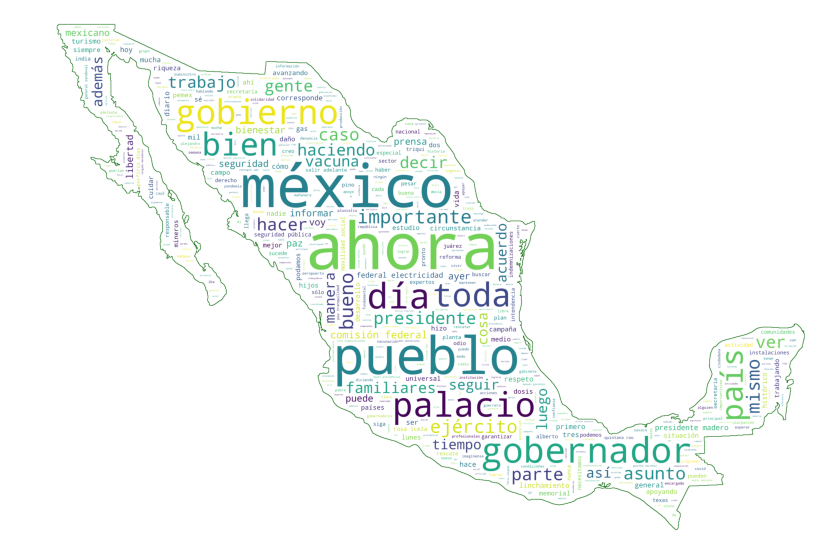

In [91]:
import os
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image 

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

map_mask = np.array(Image.open('../images/mask_mexico.png'))

wc = WordCloud(max_words=3000, margin=10, background_color='white',
scale=3, relative_scaling = 0.5, width=400, height=300, mask=map_mask,
random_state=1, stopwords=stop_words, contour_width=3, contour_color='darkgreen')

wc.generate(' '.join(filtered_words))

# store to file
wc.to_file(path.join(d, '../images/saved_images/wordcloud_presidente_2021_02_19.png') )

plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [92]:
import collections

#filtered_words = [word for word in data.split() if word not in stop_words]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

In [93]:
for i, word in enumerate(words):
    print(words[i] + ": " + str(counts[i]))


ahora: 22
méxico: 22
pueblo: 17
gobernador: 16
palacio: 15
presidente: 15
días: 13
paz: 13
gobierno: 13
bien: 13


<BarContainer object of 10 artists>

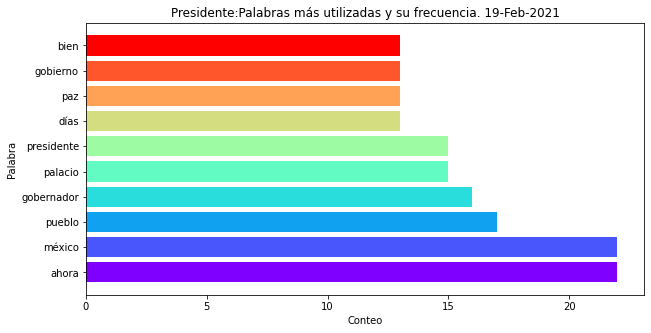

In [94]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

from matplotlib import rcParams

colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 10, 5

plt.title('Presidente:Palabras más utilizadas y su frecuencia. 19-Feb-2021')
plt.xlabel('Conteo')
plt.ylabel('Palabra')
plt.barh(words, counts, color=colors)

### Análisis para Rosa Icela Rodríguez Velázquez

In [95]:
dfe

,clean_speech
speaker,
ANDRÉ GEORGES FOULLON VAN LISSUM,", : Buenos días tengan todos ustedes. Soy el g..."
Andrés Manuel López Obrador,Presidente de México t. 5093 4900 t. 01800 08...
INTERLOCUTOR,: ¿Tienen algún estimado del impacto económico...
INTERLOCUTORA,": Buenos días a todos. Es un gusto saludarlo, ..."
JESÚS RAMÍREZ CUEVAS,: ‘AMLO lincha desde la conferencia mañanera.’
LUIS RODRÍGUEZ BUCIO,", : Buenos días. En esta ocasión me voy a perm..."
PREGUNTA,": Sí, estaba en lista. : Buenos días a todos. ..."
PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,: Buenos días. Hoy vamos a informar sobre el a...
RAFAEL OJEDA DURÁN,", : Continuando con la presentación, por favor..."


In [96]:
# Take the speech from Rosa Icela Rodríguez
text = dfe['clean_speech'][9]
text

', : Muy buenos días. Con su permiso, señor presidente de México, licenciado . Como hacemos cada mes, alrededor del día 20, hoy presentamos los avances y retos para la construcción de la paz en nuestro país, reporte en el que contribuyen instituciones federales, estatales y municipales. Iniciar esta intervención diciendo que se tiene un mejor arranque de año con relación al 2020. Durante enero de 2021 se registró una disminución de 19.6 por ciento en los delitos del fuero federal con respecto al mismo mes del año pasado, mientras que en 16 de los 18 delitos del fuero común también hubo una considerable baja. Estos buenos resultados se deben a la coordinación, constancia y disciplina del Gabinete de Seguridad Nacional, encabezado por el presidente de la República, que se reúne todos los días a las 6:00 de la mañana y en el que participan la secretaria de Gobernación, doctora Olga Sánchez Cordero; el consejero jurídico, licenciado Julio Scherer Ibarra; el secretario de la Defensa Naciona

In [97]:
# Add stopwords in spanish
stop_words = ["ciento", "entonces", "vamos", "pues", "va", "aquí", "si"] + stop_words_es #Adding aditional StopWords

print(stop_words)

['ciento', 'entonces', 'vamos', 'pues', 'va', 'aquí', 'si', 'a', 'al', 'algo', 'algunas', 'algunos', 'ante', 'antes', 'como', 'con', 'contra', 'cual', 'cuando', 'de', 'del', 'desde', 'donde', 'durante', 'e', 'el', 'ella', 'ellas', 'ellos', 'en', 'entre', 'era', 'erais', 'eran', 'eras', 'eres', 'es', 'esa', 'esas', 'ese', 'eso', 'esos', 'esta', 'estaba', 'estabais', 'estaban', 'estabas', 'estad', 'estada', 'estadas', 'estado', 'estados', 'estamos', 'estando', 'estar', 'estaremos', 'estará', 'estarán', 'estarás', 'estaré', 'estaréis', 'estaría', 'estaríais', 'estaríamos', 'estarían', 'estarías', 'estas', 'este', 'estemos', 'esto', 'estos', 'estoy', 'estuve', 'estuviera', 'estuvierais', 'estuvieran', 'estuvieras', 'estuvieron', 'estuviese', 'estuvieseis', 'estuviesen', 'estuvieses', 'estuvimos', 'estuviste', 'estuvisteis', 'estuviéramos', 'estuviésemos', 'estuvo', 'está', 'estábamos', 'estáis', 'están', 'estás', 'esté', 'estéis', 'estén', 'estés', 'fue', 'fuera', 'fuerais', 'fueran', 'fue

In [98]:
# Tokenise the data set
from nltk.tokenize import sent_tokenize, word_tokenize

words = word_tokenize(text)

# Removes punctuation and numbers
wordsFiltered = [word.lower() for word in words if word.isalpha()]

# Remove stop words from tokenised data set

filtered_words = [word for word in wordsFiltered if word not in stop_words]
print(filtered_words)

['buenos', 'días', 'permiso', 'señor', 'presidente', 'méxico', 'licenciado', 'hacemos', 'cada', 'mes', 'alrededor', 'día', 'hoy', 'presentamos', 'avances', 'retos', 'construcción', 'paz', 'país', 'reporte', 'contribuyen', 'instituciones', 'federales', 'estatales', 'municipales', 'iniciar', 'intervención', 'diciendo', 'mejor', 'arranque', 'año', 'relación', 'enero', 'registró', 'disminución', 'delitos', 'fuero', 'federal', 'respecto', 'mismo', 'mes', 'año', 'pasado', 'mientras', 'delitos', 'fuero', 'común', 'considerable', 'baja', 'buenos', 'resultados', 'deben', 'coordinación', 'constancia', 'disciplina', 'gabinete', 'seguridad', 'nacional', 'encabezado', 'presidente', 'república', 'reúne', 'días', 'mañana', 'participan', 'secretaria', 'gobernación', 'doctora', 'olga', 'sánchez', 'cordero', 'consejero', 'jurídico', 'licenciado', 'julio', 'scherer', 'ibarra', 'secretario', 'defensa', 'nacional', 'general', 'luis', 'cresencio', 'sandoval', 'secretario', 'marina', 'almirante', 'rafael', '

In [99]:

counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)
    
print(words, counts)

['delitos', 'robo', 'paz', 'mes', 'seguridad', 'bajó', 'nacional', 'construcción', 'enero', 'presidente'] [12, 11, 10, 9, 9, 9, 8, 7, 7, 6]


<BarContainer object of 10 artists>

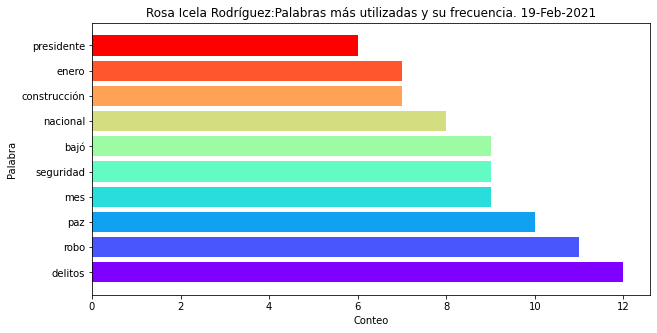

In [100]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 10, 5

plt.title('Rosa Icela Rodríguez:Palabras más utilizadas y su frecuencia. 19-Feb-2021')
plt.xlabel('Conteo')
plt.ylabel('Palabra')
plt.barh(words, counts, color=colors)

In [101]:
!pwd

/Users/fertorresmx/Projects/Otros/scraping-conferencias/notebook


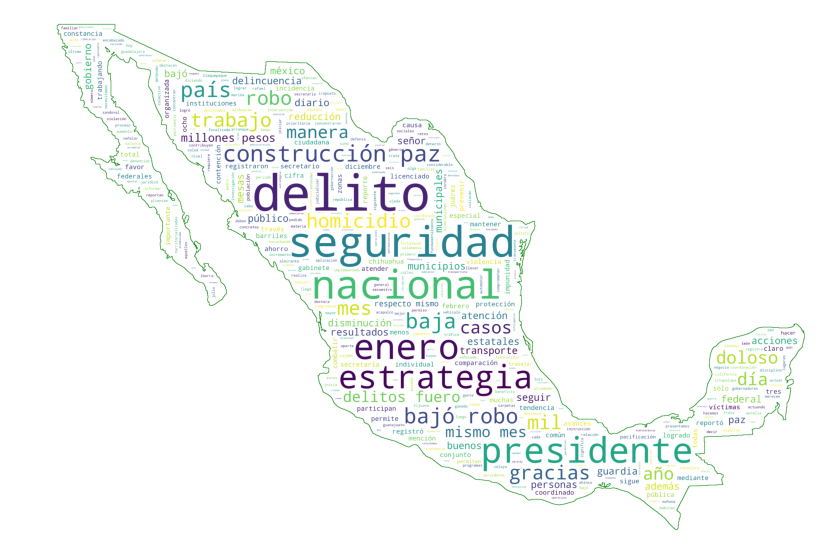

In [102]:
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

map_mask = np.array(Image.open('../images/mask_mexico.png'))

wc = WordCloud(max_words=3000, margin=10, background_color='white',
scale=3, relative_scaling = 0.5, width=400, height=300, mask=map_mask,
random_state=1, stopwords=stop_words, contour_width=4, contour_color='green')

wc.generate(' '.join(filtered_words))

# store to file
wc.to_file(path.join(d, '../images/saved_images/wordcloud_rosa_icela_rodriguez_2021_02_19.png'))

plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis("off")
plt.show()
